### 多元线性回归：多个特征


##### 使用最小二乘法求解多元线性回归的参数
##### 逆矩阵存在的充分必要条件是矩阵不存在多重共线性（矩阵的行列式不为0）
##### 使用最小二乘法时，标签的分布必须服从正态分布

In [5]:
from sklearn.linear_model import LinearRegression as LR


### 参数解析：
##### fit_intercept:布尔值，默认为True，是否计算截距
##### normalize:布尔值，默认为False，特征矩阵在回归前是否进行标准化（去中心化），并处以L反噬
##### copy_x:布尔值，用于是否在x.copy()上面操作，默认为True
##### n_jobs:工作线程数，如果为-1,表示使用全部CPU进行计算，默认为1

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing as fch #加利福尼亚房价数据集
import pandas as pd


In [14]:
data=fch()
x=data.data
y=data.target
x=pd.DataFrame(x)
y=pd.DataFrame(y)
x

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [15]:
x.max()


0       15.000100
1       52.000000
2      141.909091
3       34.066667
4    35682.000000
5     1243.333333
6       41.950000
7     -114.310000
dtype: float64

In [16]:
x.min()

0      0.499900
1      1.000000
2      0.846154
3      0.333333
4      3.000000
5      0.692308
6     32.540000
7   -124.350000
dtype: float64

In [17]:
y.max()


0    5.00001
dtype: float64

In [18]:
y.min()

0    0.14999
dtype: float64

In [21]:
# 数据解析
x.columns=fch().feature_names

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [22]:
info=["该街区住户的收入中位数","该街区房屋使用年代的中位数","该街区平均房间数目","该街区平均卧室数目","该街区人口","平均入住率","街区的纬度","街区的经度"]
info=dict(zip(x.columns,info))
info

{'MedInc': '该街区住户的收入中位数',
 'HouseAge': '该街区房屋使用年代的中位数',
 'AveRooms': '该街区平均房间数目',
 'AveBedrms': '该街区平均卧室数目',
 'Population': '该街区人口',
 'AveOccup': '平均入住率',
 'Latitude': '街区的纬度',
 'Longitude': '街区的经度'}

In [120]:
# 划分数据集
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=420)
# 修改索引
for i in [x_train,x_test,y_train,y_test]:
    i.index=range(i.shape[0])
    

In [61]:
# 如果希望对数据进行标准化，先对训练集进行fit，然后去用于训练集和测试集
from sklearn.preprocessing import StandardScaler #标准化
x_tr=x_train.copy()
x_te=x_test.copy()
y_tr=y_train.copy()
y_te=y_test.copy()

ss=StandardScaler().fit(x_tr)
x_tr=ss.transform(x_tr)
x_te=ss.transform(x_te)

ssy=StandardScaler().fit(y_tr)
y_tr=ssy.transform(y_tr)
y_te=ssy.transform(y_te)

In [62]:
# 不进行标准化，开始建模
reg=LR(fit_intercept=False).fit(x_train,y_train) #拟合
yHat=reg.predict(x_test) #预测
yHat

array([[1.46824464],
       [0.73320386],
       [1.86207317],
       ...,
       [2.18678728],
       [1.91922961],
       [0.78664554]])

In [63]:
# 查看w
reg.coef_ #w，系数向量

array([[ 5.11004560e-01,  1.65398231e-02, -1.80099701e-01,
         8.41580880e-01,  1.37035073e-05, -4.15519993e-03,
        -6.26082708e-02, -1.58235754e-02]])

In [64]:
# 查看截距
reg.intercept_

0.0

In [82]:
x_train.columns,reg.coef_
t=list(x_train.columns)
r=reg.coef_.tolist()[0]
list(zip(t,r))

[('MedInc', 0.5110045597711509),
 ('HouseAge', 0.016539823050682585),
 ('AveRooms', -0.18009970103529468),
 ('AveBedrms', 0.8415808795203695),
 ('Population', 1.3703507323402364e-05),
 ('AveOccup', -0.004155199930715188),
 ('Latitude', -0.06260827083267713),
 ('Longitude', -0.015823575414810144)]

### 回归的模型评估指标

In [83]:
# MSE均方误差和
from sklearn.metrics import mean_squared_error as MSE
MSE(y_test,yHat) #均方误差

0.615934516909277

In [93]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

In [94]:
# 使用交叉验证
cross_val_score(reg,x,y,cv=10,scoring="neg_mean_squared_error") #一种损失（本质是一种损失）

array([-0.40044727, -0.55550722, -0.9033955 , -0.42100984, -0.809625  ,
       -0.5670704 , -0.44944883, -0.9458456 , -0.9261885 , -0.40538178])

In [95]:
# MAE绝对平均误差
cross_val_score(reg,x,y,cv=10,scoring="neg_mean_absolute_error") #MAE

array([-0.43673961, -0.6169903 , -0.6909458 , -0.50077044, -0.65985281,
       -0.53940524, -0.55269627, -0.71563154, -0.72313296, -0.47228311])

In [103]:
# 使用R方进行评估
# R^2=1-RSS/方差*m(样本数)
from sklearn.metrics import r2_score
r2_score(y_test,yHat) #相同评估指标，结果不一致(顺序必须真实值在前，预测值在后)

0.5409991450306522

In [110]:
r2=reg.score(x_test,y_test)
r2

0.5409991450306522

##### 通过观察图像观察拟合效果



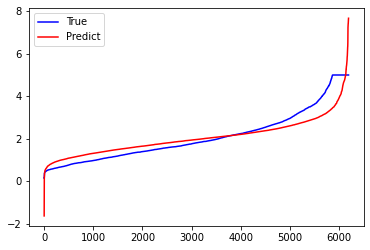

In [124]:
# 画图观察结果
import matplotlib.pyplot as plt

plt.plot(range(len(y_test)),sorted(y_test[0].tolist()),c="b",label="True")
plt.plot(range(len(yHat)),sorted(yHat),c="r",label="Predict")

plt.legend()
plt.show()

### 自创数据，进行观察
### R方可以为负数
##### R^2=(ESS+2sum((y-y_mean)(yHat-y_mean)))/TSS ,当yHat-y_mean小于0时，就可能为负
##### TSS=sum((y-y_mean)^2)
##### ESS=sum((yHat-y_mean)^2)
##### TSS=RSS+ESS 该表达式不是永远成立

In [123]:
import numpy as np
rng=np.random.RandomState(42)
x1=rng.randn(100,80)
y1=rng.randn(100)

cross_val_score(LR(),x1,y1,cv=5,scoring="r2")

array([-180.67246194,   -5.66780145,  -15.66792619,  -77.40687841,
        -65.58285907])

In [134]:
info=["该街区住户的收入中位数","该街区房屋使用年代的中位数","该街区平均房间数目","该街区平均卧室数目","该街区人口","平均入住率","街区的纬度","街区的经度"]
info=dict(zip(x.columns,info))
info

{'MedInc': '该街区住户的收入中位数',
 'HouseAge': '该街区房屋使用年代的中位数',
 'AveRooms': '该街区平均房间数目',
 'AveBedrms': '该街区平均卧室数目',
 'Population': '该街区人口',
 'AveOccup': '平均入住率',
 'Latitude': '街区的纬度',
 'Longitude': '街区的经度'}

### 多重线性回归


### 多重共线性
##### 精确相关关系（完全相关）：一行可以由另外一行线性表示
##### 高度相关关系：两行不线性相关，但是矩阵的行列式非常接近于0。会使得w趋于无穷

In [139]:
# 对于多重共线性
# 1.使用统计学的先验思路
# 2.使用向前逐步回归
# 3.改进线性回归

### 3.改进线性回归
### 岭回归:通过加入一个正则化项，使得行列式满秩（存在逆矩阵）

from sklearn.linear_model import Ridge,LinearRegression,Lasso
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt


h=fch()

x=pd.DataFrame(h.data)
y=h.target

x.columns=h.feature_names
x.head()


# 使用岭回归
# 加入正则项
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=420)
reg=Ridge(alpha=1).fit(x_train,y_train)
reg.score(x_test,y_test)

0.6043610352312285

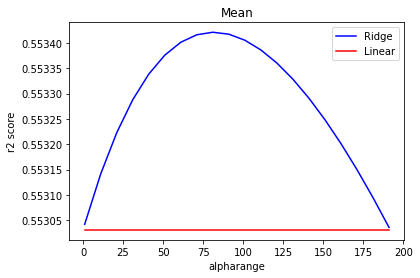

In [142]:
# 根据不同alpha取值绘制图像

alpharange=np.arange(1,200,10)
ridge,lr=[],[]

for alpha in alpharange:
    reg=Ridge(alpha=alpha)
    linear=LinearRegression()
    ridge.append(cross_val_score(reg,x,y,cv=5,scoring="r2").mean())
    lr.append(cross_val_score(linear,x,y,cv=5,scoring="r2").mean())
    
plt.plot(alpharange,ridge,c="b",label="Ridge")
plt.plot(alpharange,lr,c="r",label="Linear")
plt.title("Mean")
plt.xlabel("alpharange")
plt.ylabel("r2 score")
plt.legend()
plt.show()

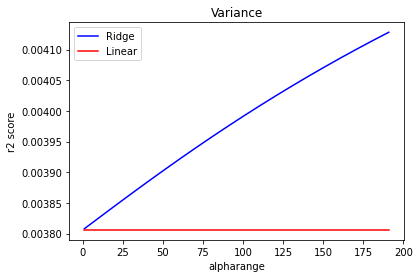

In [143]:
# 根据不同alpha取值绘制图像

alpharange=np.arange(1,200,10)
ridge,lr=[],[]

for alpha in alpharange:
    reg=Ridge(alpha=alpha)
    linear=LinearRegression()
    ridge.append(cross_val_score(reg,x,y,cv=5,scoring="r2").var())
    lr.append(cross_val_score(linear,x,y,cv=5,scoring="r2").var())
    
plt.plot(alpharange,ridge,c="b",label="Ridge")
plt.plot(alpharange,lr,c="r",label="Linear")
plt.title("Variance")
plt.xlabel("alpharange")
plt.ylabel("r2 score")
plt.legend()
plt.show()

### 使用波士顿房价数据集

In [145]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score

x=load_boston().data
y=load_boston().target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=420)
x.shape

(506, 13)

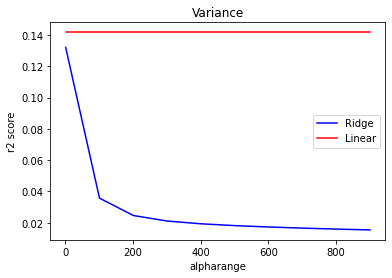

In [147]:
# 查看方差变化(说明存在高度相关)
# 根据不同alpha取值绘制图像

alpharange=np.arange(1,1001,100)
ridge,lr=[],[]

for alpha in alpharange:
    reg=Ridge(alpha=alpha)
    linear=LinearRegression()
    ridge.append(cross_val_score(reg,x,y,cv=5,scoring="r2").var())
    lr.append(cross_val_score(linear,x,y,cv=5,scoring="r2").var())
    
plt.plot(alpharange,ridge,c="b",label="Ridge")
plt.plot(alpharange,lr,c="r",label="Linear")
plt.title("Variance")
plt.xlabel("alpharange")
plt.ylabel("r2 score")
plt.legend()
plt.show()

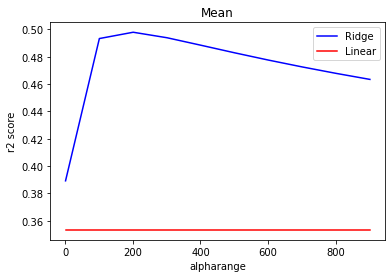

In [149]:
# 根据不同alpha取值绘制图像

alpharange=np.arange(1,1001,100)
ridge,lr=[],[]

for alpha in alpharange:
    reg=Ridge(alpha=alpha)
    linear=LinearRegression()
    ridge.append(cross_val_score(reg,x,y,cv=5,scoring="r2").mean())
    lr.append(cross_val_score(linear,x,y,cv=5,scoring="r2").mean())
    
plt.plot(alpharange,ridge,c="b",label="Ridge")
plt.plot(alpharange,lr,c="r",label="Linear")
plt.title("Mean")
plt.xlabel("alpharange")
plt.ylabel("r2 score")
plt.legend()
plt.show()

### 选取最佳正则化参数

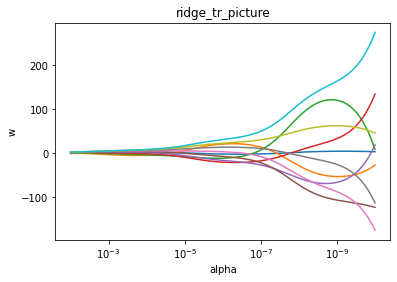

线条交叉越多，特征之间的多重共线性越高
应该选择系数较为平稳的喇叭口所对应的alpha值作为参数


In [154]:
##### 岭迹图（alpha与参数w）

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# 创造西伯尔特矩阵
x=1./(np.arange(1,11)+np.arange(0,10)[:,np.newaxis])
y=np.ones(10)

# 计算横坐标
n_alphas=200
alphas=np.logspace(-10,-2,n_alphas)

#建模，获取每一个正则化值下的系数组合
coefs=[]
for a in alphas:
    ridge=linear_model.Ridge(alpha=a,fit_intercept=False)
    ridge.fit(x,y)
    coefs.append(ridge.coef_)
    
# 绘制图像
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1]) #将横坐标逆转
plt.xlabel("alpha")
plt.ylabel("w")
plt.title("ridge_tr_picture")
plt.axis("tight")
plt.show()

print("线条交叉越多，特征之间的多重共线性越高")
print("应该选择系数较为平稳的喇叭口所对应的alpha值作为参数")

### 岭回归交叉验证
##### alpha:需要测试的正则化参数范围
##### scoring:默认为R方,评估指标
##### store_cv_values ：是否保存每次交叉验证的结果，默认为False
##### cv:交叉折数，默认留一交叉验证

##### alpha_:查看选中的alpha
##### cv_values:调用所有交叉验证的结果
##### score:返回R方



In [172]:
from sklearn.linear_model import RidgeCV,LinearRegression
from sklearn.linear_model import Lasso
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

h=fch()
x=pd.DataFrame(h.data)
y=h.target
x.columns=h.feature_names

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=420)

Ridge_=RidgeCV(alphas=np.arange(1,1001,100)
               ,scoring="neg_mean_squared_error"
              ,store_cv_values=True
              # ,cv=5 #不为空h时不会保存交叉结果
              ).fit(x,y)

Ridge_.score(x_test,y_test)
Ridge_.score(x,y)

0.6060251767338423

In [173]:
Ridge_.cv_values_.mean(axis=0) #平均得分

array([-6.10618033e-05, -9.07302179e-05, -1.11785961e-04, -1.27544011e-04,
       -1.39823410e-04, -1.49699514e-04, -1.57846229e-04, -1.64706208e-04,
       -1.70581703e-04, -1.75685916e-04])

In [174]:
Ridge_.alpha_ #最佳正则化项

101

### 使用Lasso（最小绝对收缩和选择算子）
##### Lasso无法解决特征之间精确相关的问题
##### 如果线性回归无解或者报除0错误，使用Lasso不能解决问题

In [213]:
from sklearn.linear_model import Lasso,Ridge #可以用来做特征选择
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.datasets import fetch_california_housing as fch

import numpy as np
import pandas as pd


f=fch()
x=pd.DataFrame(f.data)
x.columns=f.feature_names

y=f.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=420)
for i in [x_train,x_test]:
    i.index=range(i.shape[0])
    
x_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,4.1776,35.0,4.425172,1.030683,5380.0,3.368817,37.48,-122.19
1,5.3261,38.0,6.267516,1.089172,429.0,2.732484,37.53,-122.30
2,1.9439,26.0,5.768977,1.141914,891.0,2.940594,36.02,-119.08
3,2.5000,22.0,4.916000,1.012000,733.0,2.932000,38.57,-121.31
4,3.8250,34.0,5.036765,1.098039,1134.0,2.779412,33.91,-118.35


In [214]:
# 线性回归进行拟合
reg=LinearRegression().fit(x_train,y_train)
(reg.coef_*100).tolist() #查看系数

[43.73589305968394,
 1.0211268294493865,
 -10.780721617317587,
 62.643382753637525,
 5.2161253533133944e-05,
 -0.33485096463337294,
 -41.30959378947716,
 -42.62109536208476]

In [217]:
# 岭回归进行拟合
ridge=Ridge(alpha=1).fit(x_train,y_train)
(ridge.coef_*100).tolist()

[43.72233876552478,
 1.021366930100733,
 -10.754651565416,
 62.50772248729578,
 5.310340112609561e-05,
 -0.33481978032109433,
 -41.307341363589174,
 -42.616934171697345]

In [218]:
# Lasso回归
lasso=Lasso(alpha=0.01).fit(x_train,y_train)
(lasso.coef_*100).tolist() #查看系数（Lasso对alpha取值敏感）

[40.10568371834486,
 1.0936292607860139,
 -3.742376361024466,
 26.524037834897214,
 0.00035253685115039585,
 -0.3207129394887794,
 -40.0648304734484,
 -40.81754399163315]

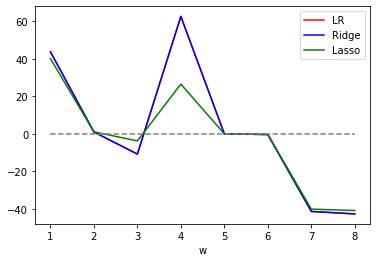

In [220]:
# 使用绘图进行比较
plt.plot(range(1,9),(reg.coef_*100).tolist(),color="r",label="LR")
plt.plot(range(1,9),(ridge.coef_*100).tolist(),color="b",label="Ridge")
plt.plot(range(1,9),(lasso.coef_*100).tolist(),color="g",label="Lasso")
plt.plot(range(1,9),[0]*8,c="gray",linestyle="--")
plt.xlabel("w")
plt.legend()
plt.show()

### 选取最佳正则化参数

In [228]:
from sklearn.linear_model import LassoCV
# 参数：eps:正则化路径长度，默认为0,01
# n_alphas:正则化路径中alpha的个数,默认100
# alphas:需要测试的正则化参数的取值的元组，默认为None,当不输入时，自定使用eps和n_slphas自定生成
# cv:交叉验证的折数，默认3折交叉验证
# 属性
# alpha_：最佳alpha参数
# alphas_:使用正则化路径长度
# coef_:调用最佳正则化时的系数
from sklearn.datasets import fetch_california_housing as fch

import numpy as np
import pandas as pd


f=fch()
x=pd.DataFrame(f.data)
x.columns=f.feature_names

y=f.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=420)
for i in [x_train,x_test]:
    i.index=range(i.shape[0])
    
x_train.head()


alpharange=np.logspace(-10,-2,200,base=10)
alpharange.shape

(200,)

In [229]:
# 使用交叉验证
lasso_=LassoCV(alphas=alpharange
               ,cv=5
              ).fit(x_train,y_train)
lasso_.alpha_ #最佳参数

0.0020729217795953697

In [234]:
lasso_.mse_path_.shape #返回每一个alpha下的五折交叉验证结果

(200, 5)

In [236]:
lasso_.mse_path_.mean(axis=1) #均方误差

array([0.52816924, 0.52742297, 0.5268146 , 0.52632488, 0.52593241,
       0.52561942, 0.52537133, 0.5251761 , 0.52502385, 0.52490641,
       0.52481712, 0.52475046, 0.52470198, 0.52466795, 0.52464541,
       0.52463188, 0.5246254 , 0.52462436, 0.52462744, 0.52463361,
       0.52464201, 0.52465199, 0.52466301, 0.52467466, 0.5246866 ,
       0.5246986 , 0.52471046, 0.52472203, 0.5247332 , 0.52474392,
       0.52475413, 0.52476379, 0.52477291, 0.52478147, 0.52478949,
       0.52479697, 0.52480393, 0.52481039, 0.52481639, 0.52482193,
       0.52482706, 0.52483179, 0.52483615, 0.52484016, 0.52484385,
       0.52484725, 0.52485036, 0.52485322, 0.52485584, 0.52485824,
       0.52486044, 0.52486246, 0.5248643 , 0.52486599, 0.52486753,
       0.52486895, 0.52487024, 0.52487141, 0.52487249, 0.52487348,
       0.52487437, 0.52487519, 0.52487594, 0.52487663, 0.52487725,
       0.52487782, 0.52487834, 0.52487882, 0.52487925, 0.52487965,
       0.52488001, 0.52488033, 0.52488063, 0.52488091, 0.52488

In [237]:
lasso_.coef_ #查看系数

array([ 4.29867301e-01,  1.03623683e-02, -9.32648616e-02,  5.51755252e-01,
        1.14732262e-06, -3.31941716e-03, -4.10451223e-01, -4.22410330e-01])

In [247]:
lasso_.score(x_test,y_test)

0.6038982670571436

In [238]:
# 使用自动生成alpha范围
ls_=LassoCV(eps=0.00001 #正则化步长
           ,n_alphas=300 #选择正则化数目
           ,cv=5
            ).fit(x_train,y_train)

ls_.alpha_ #最佳参数

0.0020954551690628557

In [239]:
ls_.alphas_ #查看生成的矩阵

array([2.94059737e+01, 2.82952253e+01, 2.72264331e+01, 2.61980122e+01,
       2.52084378e+01, 2.42562424e+01, 2.33400142e+01, 2.24583946e+01,
       2.16100763e+01, 2.07938014e+01, 2.00083596e+01, 1.92525862e+01,
       1.85253605e+01, 1.78256042e+01, 1.71522798e+01, 1.65043887e+01,
       1.58809704e+01, 1.52811004e+01, 1.47038891e+01, 1.41484809e+01,
       1.36140520e+01, 1.30998100e+01, 1.26049924e+01, 1.21288655e+01,
       1.16707233e+01, 1.12298864e+01, 1.08057012e+01, 1.03975388e+01,
       1.00047937e+01, 9.62688384e+00, 9.26324869e+00, 8.91334908e+00,
       8.57666619e+00, 8.25270079e+00, 7.94097249e+00, 7.64101907e+00,
       7.35239575e+00, 7.07467457e+00, 6.80744372e+00, 6.55030695e+00,
       6.30288297e+00, 6.06480491e+00, 5.83571975e+00, 5.61528779e+00,
       5.40318218e+00, 5.19908842e+00, 5.00270386e+00, 4.81373731e+00,
       4.63190858e+00, 4.45694804e+00, 4.28859627e+00, 4.12660362e+00,
       3.97072991e+00, 3.82074399e+00, 3.67642348e+00, 3.53755437e+00,
      

In [246]:
ls_.alphas_.shape

(300,)

In [243]:
ls_.score(x_test,y_test)

0.6038915423819201